#LINEAR REGRESSION#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler

In [ ]:
!gdown "1mmJxVLc8N8Bsy5w5J5M2Y0KCOXNFW8fp"

Downloading...
From: https://drive.google.com/uc?id=1mmJxVLc8N8Bsy5w5J5M2Y0KCOXNFW8fp
To: /content/Real estate.csv
100% 22.0k/22.0k [00:00<00:00, 54.1MB/s]


##A. LOAD DATA##

In [ ]:
df = pd.read_csv("Real estate.csv")

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
X = df.drop(["Y house price of unit area", 'No'], axis=1)

In [ ]:
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [ ]:
Y = df["Y house price of unit area"]

In [ ]:
Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [ ]:
Y_data = Y.to_numpy()
Y_data

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

##B. SPLIT TRAIN AND TEST##

In [ ]:
X_Train, y_train, X_Test, y_test = X[:300], Y_data[:300], X[300:], Y_data[300:]
X_Train.shape

(300, 6)

In [ ]:
X_Train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
295,2013.167,18.2,2179.59000,3,24.96299,121.51252
296,2012.750,12.5,1144.43600,4,24.99176,121.53456
297,2012.833,34.9,567.03490,4,24.97003,121.54580
298,2013.333,16.7,4082.01500,0,24.94155,121.50381


##C. NORMALIZE FEATURES##

In [ ]:
#@title Using sklearn.preprocessing.StandardScaler()

# SC = StandardScaler()
# SC.fit(X_Train)

In [ ]:
#@title Standardization
def normalize(X):
  df = X.copy(deep=False)
  scale = []
  cols = df.columns.values
  for col in cols:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean)/std
    scale.append([mean, std])
  return df, scale

In [ ]:
X_Train_normalized, scale_X = normalize(X_Train)
X_train = X_Train_normalized.to_numpy()

In [ ]:
X_train

array([[-0.84629424,  1.25008516, -0.78463247,  2.00992087,  1.11516979,
         0.44291319],
       [-0.84629424,  0.14532722, -0.61133742,  1.6677096 ,  0.90443608,
         0.39555876],
       [ 1.53276968, -0.40263271, -0.41172255,  0.29886451,  1.47277851,
         0.68098277],
       ...,
       [-1.14635635,  1.506389  , -0.40777512, -0.04334676,  0.08145709,
         0.80358535],
       [ 0.63972767, -0.10213855,  2.33956365, -1.41219185, -2.19191261,
        -1.92026787],
       [ 0.04674777,  1.35614192, -0.75583224,  2.00992087,  1.01938174,
         0.46561738]])

In [ ]:
#@title Save Scale_X to normalize X_Test
scale_X

[[2013.1539133333338, 0.2799420373992398],
 [17.855666666666664, 11.314695858194053],
 [1088.747563266667, 1279.4126980517897],
 [4.126666666666667, 2.9221714257884557],
 [24.969009533333338, 0.012527658835628343],
 [121.53341220000001, 0.0154156617953506]]

##D. LINEAR REGRESSION IMPLEMENTATION##

In [ ]:
#@title Predict
def predict(x, w, b):
  return sum(a*b for a, b in zip(w, x)) + b

In [ ]:
#@title Compute Loss
def compute_loss(y_pred, y_data):
  return (y_pred-y_data)**2

In [ ]:
#@title Linear Regression

def linear_regression(X_data, y_data, lr=0.001, epochs=10000):
  w = np.array([random.uniform(0, 1) for _ in range(X_data.shape[1])])
  b = random.uniform(0, 1)

  losses = []
  N = len(X_data)

  for _ in range(epochs):

    total_w = np.zeros(X_data.shape[1])
    total_b = 0
    loss_each = 0

    for x, y in zip(X_data, y_data):
      y_pred = predict(x, w, b)
      loss = compute_loss(y_pred, y)
      loss_each += loss
      gradient_w = np.array([(y_pred - y)*xi for xi in x])
      gradient_b = y_pred - y
      total_w = total_w + gradient_w
      total_b += gradient_b

    total_w = total_w/N
    total_b = total_b/N
    w = [x - lr*y for x, y in zip(w, total_w)]
    b = b - lr*total_b
    losses.append(loss_each/N)

  return w, b, losses

##E. TRAINING##

In [ ]:
w, b, losses = linear_regression(X_train, y_train)
w

[1.2729305008806437,
 -3.450003223613457,
 -4.532530442146386,
 3.365138626169477,
 3.4059875696121673,
 0.4640704865250316]

In [ ]:
b

38.02995744347913

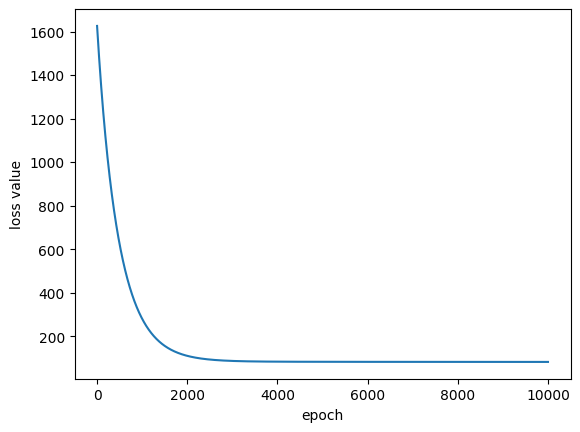

In [ ]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss value")
plt.show()

##F. EVALUATION##

In [ ]:
X_Test

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
300,2013.083,2.5,156.24420,4,24.96696,121.53992
301,2012.750,38.0,461.78480,0,24.97229,121.53445
302,2013.500,16.5,2288.01100,3,24.95885,121.51359
303,2013.500,38.3,439.71050,0,24.97161,121.53423
304,2013.417,20.0,1626.08300,3,24.96622,121.51668
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [ ]:
#@title Normalize Test with Scale_X
def normalize_test(X_temp, scale_X):
  X = X_temp.copy(deep=False)
  cols = X.columns
  i = 0
  for col in cols:
    X[col] = (X[col] - scale_X[i][0])/scale_X[i][1]
    i += 1
  return X

In [ ]:
x_test_normalized = normalize_test(X_Test, scale_X)
x_test = x_test_normalized.to_numpy()
x_test

array([[-0.25331434, -1.35714356, -0.72885267, -0.04334676, -0.16360067,
         0.42215508],
       [-1.4428463 ,  1.78036896, -0.4900395 , -1.41219185,  0.26185792,
         0.06732114],
       [ 1.23627973, -0.11981468,  0.93735465, -0.38555803, -0.81096823,
        -1.28584814],
       [ 1.23627973,  1.80688315, -0.50729297, -1.41219185,  0.20757802,
         0.05304994],
       [ 0.93978978,  0.18951754,  0.41998601, -0.38555803, -0.22266996,
        -1.08540264],
       [-0.25331434, -0.14632887, -0.62483573,  0.29886451,  1.03933758,
         0.65308906],
       [ 1.23627973, -0.30541401, -0.71811642, -1.06998058,  0.37361064,
        -0.23496883],
       [-1.14635635, -0.66777461,  1.5562941 , -1.41219185, -1.15021757,
         2.13145569],
       [ 0.93978978, -0.12865274, -0.62483573,  0.29886451,  1.03933758,
         0.65308906],
       [ 0.34323772,  1.09983808,  0.13754939, -1.41219185, -1.61079844,
        -0.2511861 ],
       [ 1.53276968, -0.12865274,  0.43359851, -0.

In [ ]:
#@title Predict in Test set
y_pred = [predict(x, w, b) for x in x_test]
y_pred

[45.18602250347297,
 28.44305991907403,
 31.11210006931114,
 31.64862947795643,
 34.10923832481198,
 45.89319867509189,
 41.47505761141753,
 24.13989723961146,
 47.350954613591554,
 23.693834633109958,
 32.465247217566194,
 40.41229492161657,
 43.65367078178761,
 45.850871757574765,
 47.98140826222356,
 36.9786502976945,
 45.619837611463026,
 38.08607884065829,
 55.44718926711631,
 33.77755612279599,
 12.666227644118795,
 42.91733199736573,
 39.64912206003182,
 43.5805529423546,
 30.987696507327676,
 39.235034586170556,
 47.7296624710243,
 45.702710849184044,
 34.20291845822492,
 13.772516710875657,
 22.967625496657597,
 12.80454041746313,
 32.49630393112481,
 43.352356568813356,
 40.281477428756894,
 40.85931597264064,
 38.86812305807148,
 35.51836593731659,
 41.552468144503756,
 51.46002177704274,
 33.199118569742296,
 39.32398429437692,
 50.40917072928025,
 42.553294691634555,
 30.015833212586493,
 40.22507503731968,
 34.154106970499356,
 12.375408335876248,
 47.92046487424889,
 43.

In [ ]:
#@title Result
result = pd.DataFrame(
    {"Y_pred": y_pred, "y_test": y_test},
    index=range(1, len(y_pred)+1)
)
result

,Y_pred,y_test
1,45.186023,36.9
2,28.443060,35.7
3,31.112100,23.2
4,31.648629,38.4
5,34.109238,29.4
...,...,...
110,14.884082,15.4
111,50.439662,50.0
112,46.932644,40.6
113,44.397663,52.5


In [ ]:
result['% Difference'] = ((abs(result['Y_pred']-result['y_test']))/result['y_test'])*100
result

,Y_pred,y_test,% Difference
1,45.186023,36.9,22.455346
2,28.443060,35.7,20.327563
3,31.112100,23.2,34.103880
4,31.648629,38.4,17.581694
5,34.109238,29.4,16.017817
...,...,...,...
110,14.884082,15.4,3.350117
111,50.439662,50.0,0.879324
112,46.932644,40.6,15.597644
113,44.397663,52.5,15.433023


In [ ]:
print('Number of tests with less than 5% difference:',result['% Difference'][result['% Difference'] <= 5.0].count())
print('Number of tests with less than 10% difference:',result['% Difference'][result['% Difference'] <= 10.0].count())

Number of tests with less than 5% difference: 18
Number of tests with less than 10% difference: 38


#TEST WITH SKLEARN#

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_Train, y_train)

LinearRegression()

In [ ]:
y_pred2 = reg.predict(X_Test)

In [ ]:
result2 = pd.DataFrame(
    {"Y_pred": y_pred2, "y_test": y_test},
    index=range(1, len(y_pred2)+1)
)
result2['% Difference'] = ((abs(result2['Y_pred']-result2['y_test']))/result2['y_test'])*100

In [ ]:
result2

,Y_pred,y_test,% Difference
1,45.593498,36.9,23.559615
2,29.046808,35.7,18.636391
3,31.399548,23.2,35.342879
4,32.362893,38.4,15.721632
5,34.628113,29.4,17.782696
...,...,...,...
110,14.693603,15.4,4.586993
111,50.285556,50.0,0.571111
112,46.829187,40.6,15.342826
113,44.744099,52.5,14.773145


In [ ]:
print('Number of tests with less than 5% error:', result2['% Difference'][result2['% Difference'] <= 5.0].count())
print('Number of tests with less than 10% error:', result2['% Difference'][result2['% Difference'] <= 10.0].count())

Number of tests with less than 5% error: 19
Number of tests with less than 10% error: 38
